# Network Model - Analysis

In [1]:
# Libraries
import numpy as np
import pandas as pd
import igraph as ig
import networkx as nx
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from auxiliar_funcs import *
import matplotlib.pyplot as plt
#import powerlaw as plaw
import collections
from math import log2, ceil

### Load Data

In [2]:
# LOAD DATA
url_file = "../00-Data/train.csv"
df_data = pd.read_csv(url_file)
print("Data loaded!")
print(df_data.info())

# User attributes
user_attrs = df_data.columns[2:]

# Number of users
n_users = len(df_data[user_attrs].drop_duplicates())
n_rsrcs = len(df_data.RESOURCE.drop_duplicates())
print("|U|: ", n_users) # Unique users
print("|R|: ", n_rsrcs) # Unique resources

# Create an index for every users
user_dict = {}
for u_idx, u_attr in enumerate(df_data[user_attrs].drop_duplicates().values):
    idx = "999" + str(u_idx) + "999"
    user_dict[int(idx)] = list(u_attr)
print("|U| :", len(user_dict))

# Create a new column to add in a DF
list_usr_idx = []
key_list = list(user_dict.keys()) # list out keys and values separately
val_list = list(user_dict.values())
for log in df_data[user_attrs].values:
    key_idx = val_list.index(list(log))
    list_usr_idx.append(key_list[key_idx])
print("|L'| :", len(list_usr_idx), " = |L| :", len(df_data))
df_data["USERID"] = list_usr_idx

print()
df_pos_entries = df_data[df_data.ACTION==1]
df_neg_entries = df_data[df_data.ACTION==0]
print('Num positive entries:',len(df_pos_entries), 
    "{:.4}%".format((len(df_pos_entries)/len(df_data))*100))
print('Num negative entries:',len(df_neg_entries),
    "{:.4}%".format((len(df_neg_entries)/len(df_data))*100))

##### ***** Cross-Validation Configuration ***** #####
k = 10
test_size = 0.2
kfold = StratifiedShuffleSplit(n_splits=k, test_size=test_size, random_state=1)

data_partition = kfold.split(df_data, df_data.ACTION)
data_corpus = [] # Lista donde se almacenan los k fols

for train_data, test_data in data_partition:        
    X_train, X_test = df_data.iloc[train_data], df_data.iloc[test_data]
    data_corpus.append([X_train, X_test])

print("Done!")

Data loaded!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB
None
|U|:  9561
|R|:  7518
|U| : 9561
|L'| : 32769  = |L| : 32769

Num positive entries: 30872 94.21%
Num negative entries: 1897 5.789%
Done!


### Data Pre-processing

In [62]:
##### ***** Control Variables ***** #####
id_kfold = 1
task4 = True
#########################################

df_train_k, df_test_k = data_corpus[id_kfold][0], data_corpus[id_kfold][1]
print("# Train access request =", len(df_train_k), 
      " %: {:.2f}".format((len(df_train_k)/(len(df_train_k)+len(df_test_k)))*100))
print("# Test access request =", len(df_test_k),
      " %: {:.2f}".format((len(df_test_k)/(len(df_train_k)+len(df_test_k)))*100))
print("# Total =", len(df_train_k)+len(df_test_k))
print()

##### ***** Task 1: Null and uknwokn values ***** #####
print("TASK 1: Done!"); print() # NA


##### ***** TASK 2: convert continuous values to categorical values ***** #####
print("TASK 2: Done!"); print() # NA 

##### ***** TASK 3: Drop duplicates access requests ***** #####
print("TASK 3: Drop duplicates access requests")
df_train_k_pos = df_train_k[df_train_k.ACTION==1]   # Train Pos
df_train_k_neg = df_train_k[df_train_k.ACTION==0]   # Train Neg
df_test_k_pos = df_test_k[df_test_k.ACTION==1]      # Test Pos
df_test_k_neg = df_test_k[df_test_k.ACTION==0]      # Test Neg
df_train_k_pos = df_train_k_pos[df_train_k_pos.columns[1:]].drop_duplicates()
df_train_k_neg = df_train_k_neg[df_train_k_neg.columns[1:]].drop_duplicates()
df_test_k_pos = df_test_k_pos[df_test_k_pos.columns[1:]].drop_duplicates()
df_test_k_neg = df_test_k_neg[df_test_k_neg.columns[1:]].drop_duplicates()
print()

print("# Solicitudes Train (+):", len(df_train_k_pos), " %: {:.2f}".format(
      (len(df_train_k_pos)/len(df_train_k))*100))
print("# Solicitudes Train (-):", len(df_train_k_neg), " %: {:.2f}".format(
      (len(df_train_k_neg)/len(df_train_k))*100))
print("# Solicitudes Test (+):", len(df_test_k_pos), " %: {:.2f}".format(
      (len(df_test_k_pos)/len(df_test_k))*100))
print("# Solicitudes Test (-):", len(df_test_k_neg), " %: {:.2f}".format(
      (len(df_test_k_neg)/len(df_test_k))*100))
print("# Train Users (+): ", len(df_train_k_pos.USERID.drop_duplicates()))
print("# Train Resrc (+): ", len(df_train_k_pos.RESOURCE.drop_duplicates()))
print("# Train Users (-): ", len(df_train_k_neg.USERID.drop_duplicates()))
print("# Train Resrc (-): ", len(df_train_k_neg.RESOURCE.drop_duplicates()))
print("# Test Users (+): ", len(df_test_k_pos.USERID.drop_duplicates()))
print("# Test Resrc (+): ", len(df_test_k_pos.RESOURCE.drop_duplicates()))
print("# Test Users (-): ", len(df_test_k_neg.USERID.drop_duplicates()))
print("# Test Resrc (-): ", len(df_test_k_neg.RESOURCE.drop_duplicates())); print()

if task4:
    # Filter resources
      n1 = 0
      n2 = 149
      top_list = df_train_k_pos.RESOURCE.value_counts()[:len(df_train_k_pos.RESOURCE.drop_duplicates())].index.tolist()
      # Filter the interval between n1 and n2
      top_list = top_list[n1:n2+1]
      print('#Filtered resources:', len(top_list))
      boolean_series = df_train_k_pos.RESOURCE.isin(top_list)
      df_train_k_pos = df_train_k_pos[boolean_series]
      bolean_series = df_train_k_neg.RESOURCE.isin(top_list)
      df_train_k_neg = df_train_k_neg[bolean_series]
      print("Done!")
      

# Train access request = 26215  %: 80.00
# Test access request = 6554  %: 20.00
# Total = 32769

TASK 1: Done!

TASK 2: Done!

TASK 3: Drop duplicates access requests

# Solicitudes Train (+): 24697  %: 94.21
# Solicitudes Train (-): 1518  %: 5.79
# Solicitudes Test (+): 6175  %: 94.22
# Solicitudes Test (-): 379  %: 5.78
# Train Users (+):  8548
# Train Resrc (+):  6430
# Train Users (-):  819
# Train Resrc (-):  977
# Test Users (+):  4060
# Test Resrc (+):  2767
# Test Users (-):  295
# Test Resrc (-):  284

#Filtered resources: 150
Done!


### Network Modelling

In [4]:
def build_network_model(data, usr_id_name, res_id_name, file_path=None):
    """
    Builds the Access Requests Bipartite Network from Access log.

    Args:
        data (pandas dataframe): The Access Log.
        usr_id_name (str): The name of the ID users column in the Access Log
        res_id_name (str): The name of the ID resources column in the Access Log
    
    Returns:
        Graph (iGraph): The Access Requests Bipartite Network.

    Raises:
        TypeError: If a network is not Bipartite.
    """
    
    list_of_edges = []
    bi_network = nx.Graph() # NetworkX Graph object

    for usr_idx, rsr_idx in data[[usr_id_name, res_id_name]].values:
        list_of_edges.append((int(usr_idx), int(rsr_idx))) # Tuple of edges
    bi_network.add_edges_from(list_of_edges) # Build Network with edges

    # Change networkX object to iGraph object
    bi_network = ig.Graph.from_networkx(bi_network)
    bi_network.vs['name'] = bi_network.vs["_nx_name"] # Clean name column
    del bi_network.vs["_nx_name"] # Remove uncleaned name column

    print(bi_network.summary())
    print(bi_network.vs())

    if not bi_network.is_bipartite():
        raise TypeError("The ARBN is not bipartite")

    ### Add type of node (user or resource)
    list_of_resources_in_data = list(data[res_id_name])
    list_node_type = []
    for node in bi_network.vs():
        if node['name'] in list_of_resources_in_data:
            list_node_type.append(1) # A resource
        else:
            list_node_type.append(0) # An user
    bi_network.vs["typen"] = list_node_type
    ### End node type

    if not file_path == None: # Create a file
        ig.write(bi_network, file_path)

    print("ARBN builded!")
    print(bi_network.summary())
    print("|U-Nodes| =", len(bi_network.vs.select(typen=0)))
    print("|R-Nodes| =", len(bi_network.vs.select(typen=1)))

    return bi_network
    

In [63]:
bip_network = build_network_model(df_train_k_pos, 'USERID', 'RESOURCE')

IGRAPH UN-- 5586 9501 -- 
+ attr: name (v)
ARBN builded!
IGRAPH UN-- 5586 9501 -- 
+ attr: name (v), typen (v)
|U-Nodes| = 5436
|R-Nodes| = 150


### User network

In [6]:
def get_edge_weight(i_node, j_node):
    """
    Compute the weight of an edge between i and j nodes.

    Args:
        i_node (networkX node): i node.
        j_node (networkX node): j node.
    
    Returns:
        weight (float): The weight between nodes.

    Raises:
        TypeError: if there are not an intersection
    """
    neighs_i = set(i_node.neighbors())
    neighs_j = set(j_node.neighbors())

    insersection_neighbors = neighs_i.intersection(neighs_j)
    
    weight = (len(insersection_neighbors)*len(insersection_neighbors)) / (len(neighs_i)*len(neighs_j))

    return weight


def bipartite_projection(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    #Check if the bipartite network is a bipartite network:
    if not biparte_network.is_bipartite():
        raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(typen=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        weight_ = get_edge_weight(Y_node_i, Y_node_j)
                        #print("Peso: ", Y_node_i['name'], "-", Y_node_j['name'], " => ", weight_)
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=weight_)                                 

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]
    
    return g


In [65]:
user_network = bipartite_projection(bip_network, 0)
print(user_network.summary())
# ig.write(user_network, "graphs/amz_user_network.gml")

IGRAPH UNW- 5436 743311 -- 
+ attr: name (v), weight (e)


### Network Analysis

In [66]:
density = user_network.density()
print("Density:", "{:.4f}".format(density))

avg_degree = sum(user_network.degree()) / user_network.vcount()
print("Avg. degree", "{:.4f}".format(avg_degree))

components = user_network.components()
print("Connected Components:", len(components))

cc = user_network.transitivity_avglocal_undirected()
print("Clustering Coefficient:", "{:.4f}".format(cc))

L = user_network.average_path_length()
print("Average Path Length :", "{:.4f}".format(L))

Density: 0.0503
Avg. degree 273.4772
Connected Components: 1
Clustering Coefficient: 0.8424
Average Path Length : 2.4426


In [16]:
biggest_comp = components.subgraphs()[0]

1676


Text(0, 0.5, 'P(k)')

<Figure size 432x288 with 0 Axes>

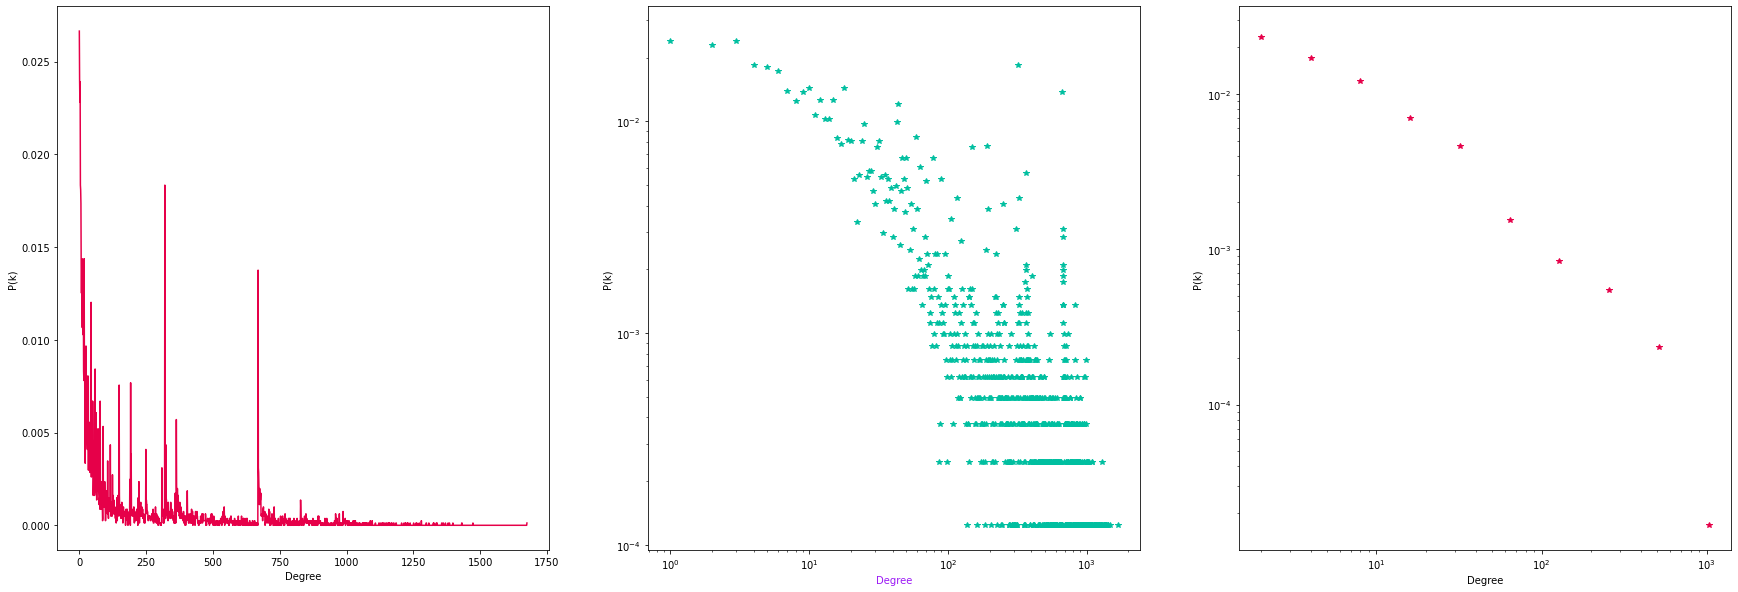

In [18]:
max_degree = max(biggest_comp.degree())
print(max_degree)

# Colors palette CATEGORICAL
# ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"]
# ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"] Pasteles
# [#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"] Dutch

# Colors palette Secquence
# ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in biggest_comp.vs():    
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / biggest_comp.vcount()

plt.clf()
fig = plt.figure(figsize=(30, 10))     

plt.subplot(1, 3, 1)
plt.plot(degree_list, color="#e60049")
plt.xlabel('Degree')
plt.ylabel('P(k)')

plt.subplot(1, 3, 2)
plt.plot(range(max_degree), degree_list, color="#00bfa0", marker='*', ls='None')
plt.loglog()
plt.xlabel('Degree', color='#9b19f5')
plt.ylabel('P(k)')

plt.subplot(1, 3, 3)
n_log_bin = ceil(log2(max(biggest_comp.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
plt.plot(x_values, y_values, color='#e60049', marker="*", ls='None')
#C = y_values[0]
#alpha = 1.4
#x = np.arange(1,len(degree_list))
#y = C*np.power(x,-alpha)
#plt.plot(x, y, "b")
plt.loglog()
plt.xlabel('Degree')
plt.ylabel('P(k)')

#plt.subplot(1, 3, 3)
#bins = np.logspace(0, 3.22, 12)
#plt.plot(bins[:-1], hist_norm, "r*")
#plt.plot(range(max_degree), degree_list, "b.")
#plt.loglog()
#plt.xlabel('Degree')
#plt.ylabel('P(k)')

In [8]:
def calculate_log_binning(degrees_list, n_bins):
    """
    Compute the log-binning y-values.
    """
    current_sum = 0
    previous_k = 0
    y_values_log_bin_list = []
    x_values = []

    for i in range(1, n_bins):
        x_values.append(previous_k)
        current_k = 2 ** (i)
        current_sum = current_sum + current_k
        temp_y_value = sum(degrees_list[previous_k:current_k])
        temp_y_value = temp_y_value / (current_k-previous_k)
        y_values_log_bin_list.append(temp_y_value)
        previous_k = current_k

        if current_sum > len(degrees_list):
            x_values.append(previous_k)
            temp_y_value = sum(degrees_list[previous_k:len(degrees_list)])
            temp_y_value = temp_y_value / (len(degrees_list)-previous_k)
            y_values_log_bin_list.append(temp_y_value)            
            break

    return x_values, y_values_log_bin_list

1668


<Figure size 432x288 with 0 Axes>

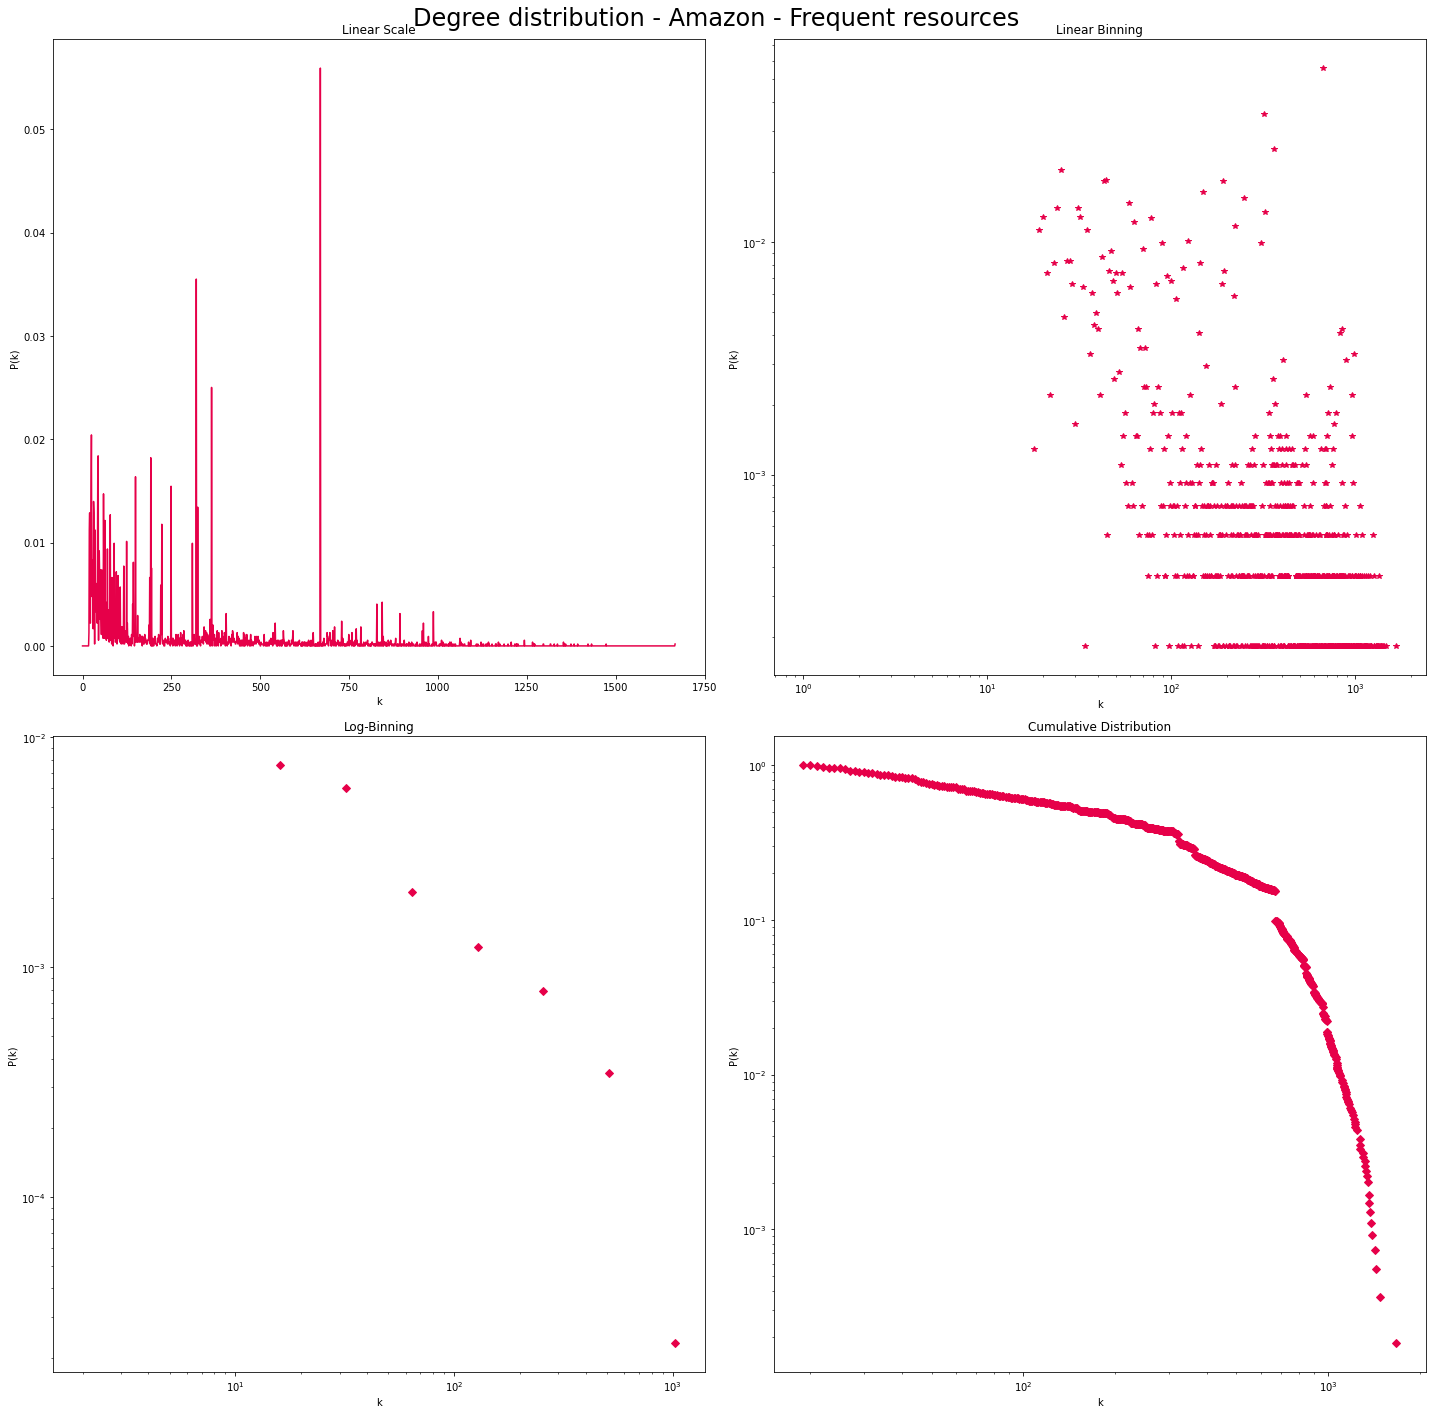

In [68]:
max_degree = max(user_network.degree())
print(max_degree)

# Colors palette CATEGORICAL
# ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"]
# ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"] Pasteles
# [#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"] Dutch

# Colors palette Secquence
# ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in user_network.vs():    
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / user_network.vcount()

plt.clf()
fig, axs = plt.subplots(2, 2, figsize=(20,20))

# LINEAR SCALE
axs[0, 0].set_title('Linear Scale')
axs[0, 0].plot(degree_list, color='#e60049')
axs[0, 0].set(ylabel='P(k)', xlabel='k')

# LINEAR BINNING
axs[0, 1].set_title('Linear Binning')
axs[0, 1].plot(range(max_degree), degree_list, color="#e60049", marker='*', ls='None')
axs[0, 1].loglog()
axs[0, 1].set(ylabel='P(k)', xlabel='k')

# LOG-BINNING
axs[1, 0].set_title('Log-Binning')
n_log_bin = ceil(log2(max(user_network.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
axs[1, 0].plot(x_values, y_values, color='#e60049', marker="D", ls='None')
axs[1, 0].loglog()
axs[1, 0].set(ylabel='P(k)', xlabel='k')

# COMULATIVE
axs[1, 1].set_title("Cumulative Distribution")
degree_sequence = sorted([d for d in user_network.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(np.array(cnt)/user_network.vcount())
axs[1, 1].loglog(deg, cs, color='#e60049', marker="D", ls='None')
axs[1, 1].set(ylabel='P(k)', xlabel='k')

fig.suptitle("Degree distribution - Amazon - Frequent resources", fontsize=24)
fig.tight_layout()
plt.show()

### Weighted distribution

1000


<Figure size 432x288 with 0 Axes>

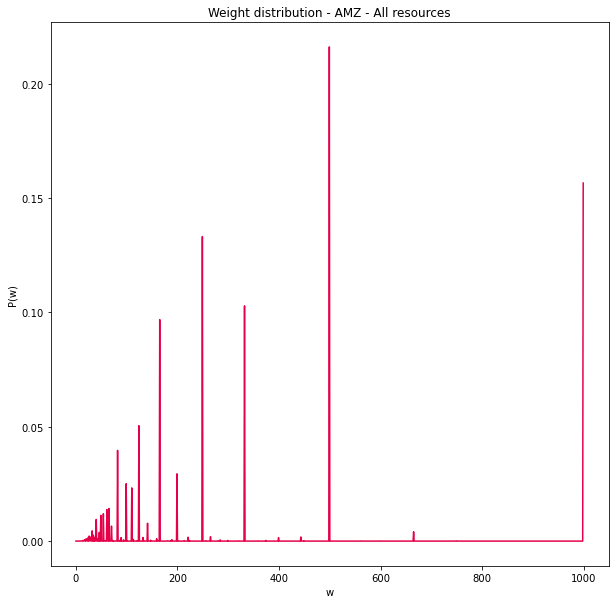

In [72]:
arreglo_test = (np.array(user_network.es['weight'])*1000).astype(int)
max_peso = max(arreglo_test)
print(max_peso)

# Crear una lista donde se almacena
arreglo_test_ = np.zeros(max_peso, dtype=int)

for node in arreglo_test:
    arreglo_test_[node-1] = (arreglo_test_[node-1] + 1)

arreglo_test_ = arreglo_test_ / user_network.ecount()

plt.clf()
plt.figure(figsize=(10,10))
plt.plot(arreglo_test_, color="#e60049")
plt.title("Weight distribution - AMZ - All resources")
plt.xlabel("w")
plt.ylabel("P(w)")
#plt.loglog()
plt.show()

In [21]:
user_network_test = user_network.copy()
user_network_test.es.select(weight_lt=0.4).delete()

In [ ]:
density = user_network_test.density()
print("Density:", density)

avg_degree = sum(user_network_test.degree()) / user_network_test.vcount()
print("Avg. degree", avg_degree)

components = user_network_test.components()
print("Connected Components:", len(components))

### Calculete changes of densities

In [32]:
densitites_list = [user_network.density()] # Store all densities values
thresholds_list = np.linspace(0, 1, num=11)[1:-1] # nine values

for thrs in thresholds_list:
    current_user_net = user_network.copy() # Create a copy of user network
    
    # Remove edges less than current threshold
    current_user_net.es.select(weight_lt=thrs).delete()
    
    current_density = current_user_net.density() # Compute density
    
    # Store current density in the density list
    densitites_list.append(current_density)

# Show densities
print(densitites_list)

[0.022874443231497874, 0.009990839019907624, 0.005340227964554199, 0.003177833267323172, 0.0022572399424410318, 0.002229144219662889, 0.0008576589058590997, 0.0008370455176734518, 0.0008365427521079481, 0.0008364540287728594]


<Figure size 432x288 with 0 Axes>

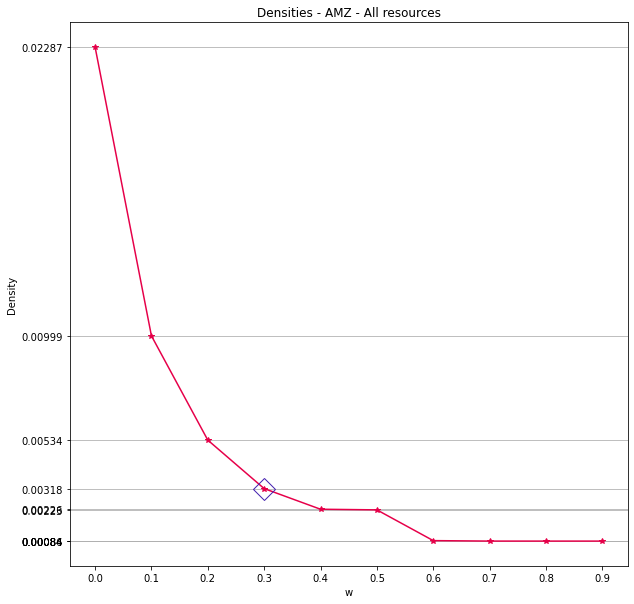

In [61]:
plt.clf()
plt.figure(figsize=(10,10))
plt.plot([0]+list(thresholds_list), densitites_list, color="#e60049", marker='*')
plt.title("Densities - AMZ - All resources")
plt.xlabel("w")
plt.xticks([0]+list(thresholds_list))
plt.ylabel("Density")
plt.yticks(densitites_list)
plt.grid(axis='y')
plt.plot(0.3, densitites_list[3], marker="D", markersize=15, fillstyle='none', color="#4421af")
#plt.loglog()
plt.show()

In [22]:
user_network_test.summary()

'IGRAPH UNW- 8224 76324 -- \n+ attr: name (v), weight (e)'

235


Text(0, 0.5, 'P(k)')

<Figure size 432x288 with 0 Axes>

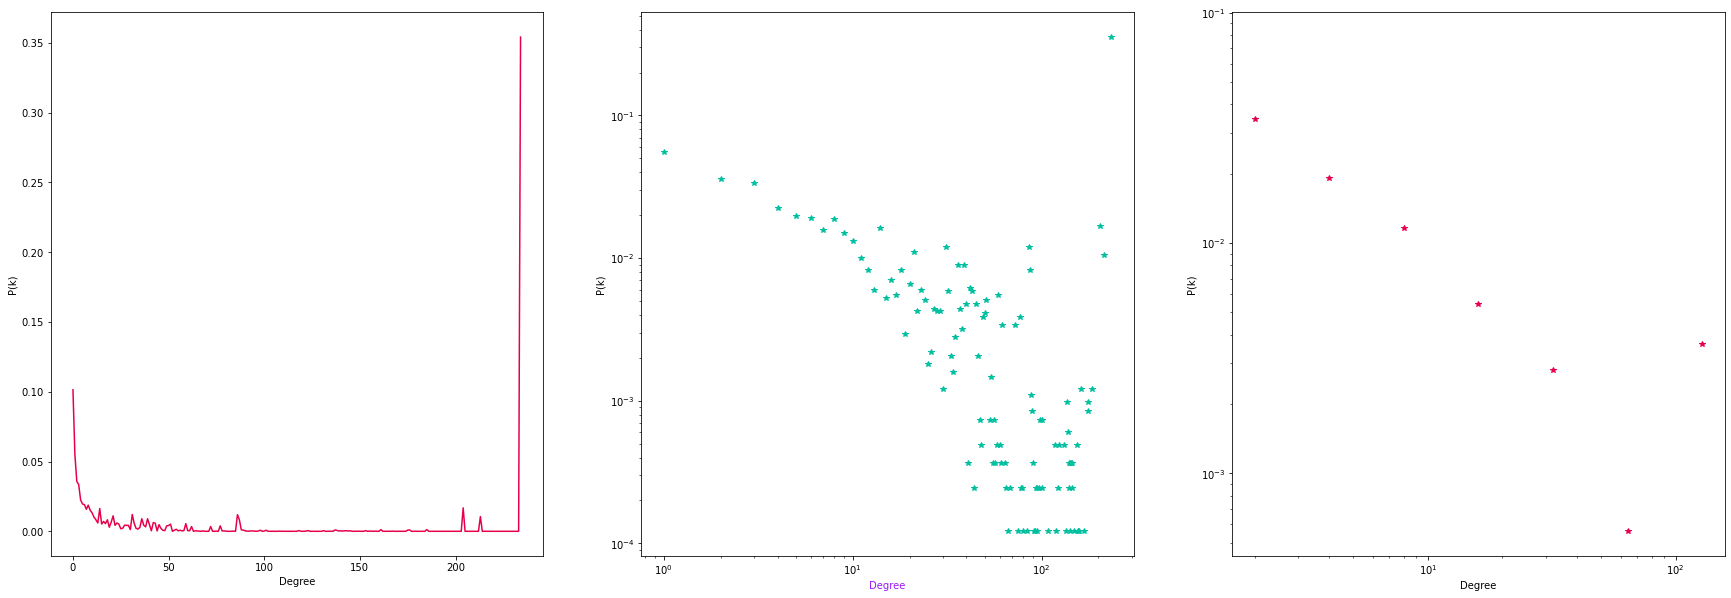

In [23]:
max_degree = max(user_network_test.degree())
print(max_degree)

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in user_network_test.vs():    
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / user_network_test.vcount()

plt.clf()
fig = plt.figure(figsize=(30, 10))     

plt.subplot(1, 3, 1)
plt.plot(degree_list, color="#e60049")
plt.xlabel('Degree')
plt.ylabel('P(k)')

plt.subplot(1, 3, 2)
plt.plot(range(max_degree), degree_list, color="#00bfa0", marker='*', ls='None')
plt.loglog()
plt.xlabel('Degree', color='#9b19f5')
plt.ylabel('P(k)')

plt.subplot(1, 3, 3)
n_log_bin = ceil(log2(max(user_network_test.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
plt.plot(x_values, y_values, color='#e60049', marker="*", ls='None')
#C = y_values[0]
#alpha = 1.4
#x = np.arange(1,len(degree_list))
#y = C*np.power(x,-alpha)
#plt.plot(x, y, "b")
plt.loglog()
plt.xlabel('Degree')
plt.ylabel('P(k)')


In [24]:
density = user_network_test.density()
print("Density:", density)

avg_degree = sum(user_network_test.degree()) / user_network_test.vcount()
print("Avg. degree", avg_degree)

components = user_network_test.components()
print("Connected Components:", len(components))

Density: 0.0022572399424410318
Avg. degree 18.561284046692606
Connected Components: 3202


In [33]:
biggest_comp = components.subgraphs()[2]

235


Text(0, 0.5, 'P(k)')

<Figure size 432x288 with 0 Axes>

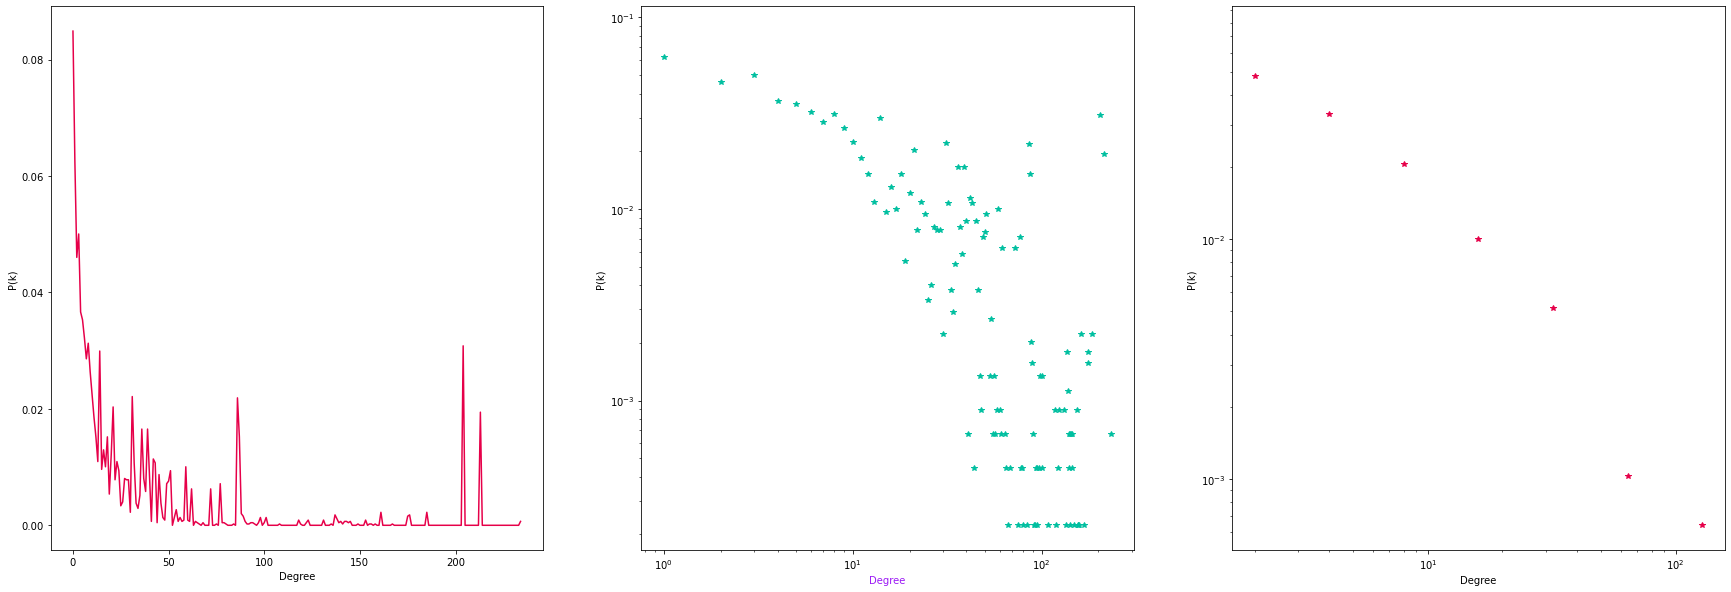

In [34]:
max_degree = max(biggest_comp.degree())
print(max_degree)

# Colors palette CATEGORICAL
# ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"]
# ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"] Pasteles
# [#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"] Dutch

# Colors palette Secquence
# ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in biggest_comp.vs():    
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / biggest_comp.vcount()

plt.clf()
fig = plt.figure(figsize=(30, 10))     

plt.subplot(1, 3, 1)
plt.plot(degree_list, color="#e60049")
plt.xlabel('Degree')
plt.ylabel('P(k)')

plt.subplot(1, 3, 2)
plt.plot(range(max_degree), degree_list, color="#00bfa0", marker='*', ls='None')
plt.loglog()
plt.xlabel('Degree', color='#9b19f5')
plt.ylabel('P(k)')

plt.subplot(1, 3, 3)
n_log_bin = ceil(log2(max(biggest_comp.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
plt.plot(x_values, y_values, color='#e60049', marker="*", ls='None')
#C = y_values[0]
#alpha = 1.4
#x = np.arange(1,len(degree_list))
#y = C*np.power(x,-alpha)
#plt.plot(x, y, "b")
plt.loglog()
plt.xlabel('Degree')
plt.ylabel('P(k)')

#plt.subplot(1, 3, 3)
#bins = np.logspace(0, 3.22, 12)
#plt.plot(bins[:-1], hist_norm, "r*")
#plt.plot(range(max_degree), degree_list, "b.")
#plt.loglog()
#plt.xlabel('Degree')
#plt.ylabel('P(k)')